In [38]:
%pwd


'C:\\Users\\Baron\\Desktop\\EE_257_Repo\\EE_257\\%ML_PATH_EE257%\\EE257_env\\Assignments\\Hw3'

In [39]:
# Libararies Associated 
# %load ../standard_import.txt

import pandas as pd # Library associated with machine learning functions
import numpy as np # NumPy is the fundamental package for scientific computing in Python 

%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt

import seaborn as sns

# Classification Models:

# Linear Models
import sklearn.linear_model as skl_lm # Linear Model

#LDA and QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Logistical Regression
from sklearn.linear_model import LogisticRegression

# Libraries for the Confusion Matrix, Classification report and the precision score
from sklearn.metrics import confusion_matrix, classification_report, precision_score



#Processing? Neighbors for KNN
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score


# Stats models
import statsmodels.api as sm
import statsmodels.formula.api as smf

import random

In [40]:
# Understanding the dataset Using Summary Statistics: TEST

import pandas as pd 
dataframe_TEST  = pd.read_csv("emnist-letters-test.csv", header = None)
dataframe_TRAIN = pd.read_csv("emnist-letters-train.csv", header = None)

dataframe_TEST.head(14000)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13996,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13997,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13998,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Summary Statistics for Test
dataframe_TEST.describe()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,14800.000000,14800.0,14800.0,14800.0,14800.0,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
mean,9.756757,0.0,0.0,0.0,0.0,0.000878,0.024122,0.044662,0.018716,0.020676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5.344566,0.0,0.0,0.0,0.0,0.106859,1.413554,2.611465,1.100400,1.238657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,5.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,14.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,19.000000,0.0,0.0,0.0,0.0,13.000000,108.000000,208.000000,106.000000,126.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Understanding the dataset Using Summary Statistics: TRAIN
dataframe_TRAIN.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
dataframe_TRAIN.describe()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,88800.000000,88800.0,88800.0,88800.0,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,...,88800.0,88800.0,88800.0,88800.000000,88800.000000,88800.0,88800.0,88800.0,88800.0,88800.0
mean,13.519268,0.0,0.0,0.0,0.000011,0.003986,0.016757,0.024640,0.021486,0.017140,...,0.0,0.0,0.0,0.003041,0.000360,0.0,0.0,0.0,0.0,0.0
std,7.502931,0.0,0.0,0.0,0.003356,0.544039,1.547686,1.915976,1.803270,1.620194,...,0.0,0.0,0.0,0.823445,0.107385,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,20.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,26.000000,0.0,0.0,0.0,1.000000,107.000000,213.000000,217.000000,214.000000,216.000000,...,0.0,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [44]:

#1. Use shape function to understand the range of the datasets

# Training Data
print(dataframe_TRAIN.shape)
# Test Data
print(dataframe_TEST.shape)
#Extra Column denoted by the rows

(88800, 785)
(14800, 785)


In [45]:
# Isolate the first column (Labels for alphabet)
# Assert Input Column
y_train = np.array(dataframe_TRAIN.iloc[:,0].values)
# Assert Output Array
x_train = np.array(dataframe_TRAIN.iloc[:,1:].values)

# Assert Input Column
y_test = np.array(dataframe_TEST.iloc[:,0].values)
# Assert Output Array
x_test = np.array(dataframe_TEST.iloc[:,1:].values)

[m, n] = x_test.shape

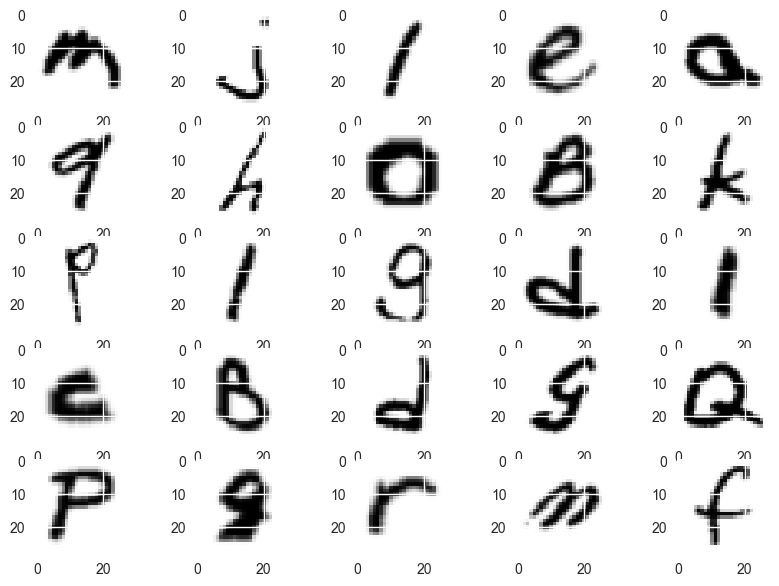

In [46]:
#Analyze the data in graphical form

fig,axes = plt.subplots(5,5,figsize=(10,7))

for i,ax in enumerate(axes.flat):
    ax.imshow(x_test[random.randrange(0,m)].reshape(28,28, order = 'F'), plt.cm.binary)

In [47]:
# Part D
# KNN (TRAINING)

y_test_a = (y_test == 1)
y_train_a = (y_train == 1)

output = KNeighborsClassifier(n_neighbors=6)

output.fit(x_train,y_train_a)

KNeighborsClassifier(n_neighbors=6)

In [48]:
prediction = output.predict(x_train)
print(prediction)
print(classification_report(y_train_a,prediction, target_names = ['not a','a'], digits = 4))

[False False False ...  True False False]
              precision    recall  f1-score   support

       not a     0.9907    0.9984    0.9945     85404
           a     0.9505    0.7638    0.8470      3396

    accuracy                         0.9894     88800
   macro avg     0.9706    0.8811    0.9208     88800
weighted avg     0.9891    0.9894    0.9889     88800



In [49]:
# LDA (Train)

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(x_train,y_train_a)


LinearDiscriminantAnalysis()

In [50]:
#Assign the prediction
LDA_predicition = lda_clf.predict(x_train)
print(LDA_predicition)

[False False False ... False False False]


In [51]:
print(classification_report(y_train_a,LDA_predicition, target_names = ['not a','a'], digits = 4))

              precision    recall  f1-score   support

       not a     0.9742    0.9875    0.9808     85404
           a     0.5215    0.3433    0.4141      3396

    accuracy                         0.9628     88800
   macro avg     0.7479    0.6654    0.6974     88800
weighted avg     0.9569    0.9628    0.9591     88800



In [52]:
#QDA (Train)
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(x_train,y_train_a)
qda_prediction = qda_clf.predict(x_train)

C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [53]:
qda_prediction = qda_clf.predict(x_train)
print(qda_prediction)

[False  True False ...  True False False]


In [54]:
print(classification_report(y_train_a,qda_prediction, target_names = ['not','a'], digits = 4))

              precision    recall  f1-score   support

         not     0.9995    0.2037    0.3384     85404
           a     0.0475    0.9976    0.0906      3396

    accuracy                         0.2340     88800
   macro avg     0.5235    0.6007    0.2145     88800
weighted avg     0.9631    0.2340    0.3289     88800



In [55]:
# Logistical Regression (Train)
clf = skl_lm.LogisticRegression(solver='newton-cg')

#fit the output
clf.fit(x_train,y_train_a) 
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

classes:  [False  True]
coefficients:  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.73752081e-04
  -1.68072642e-02 -1.81536436e-02 -4.62810815e-02 -4.17782599e-02
   2.43475836e-03 -3.12809733e-02 -9.07809046e-04  1.33343885e-05
  -9.10026063e-03 -9.79468658e-03 -2.47617493e-02 -4.24268341e-02
  -1.96608658e-02 -2.03940228e-02 -3.43982596e-03 -8.23698528e-04
  -5.31834219e-03 -4.97891276e-03 -1.82772528e-03 -2.34076390e-04
  -1.17038195e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -6.03227381e-04 -2.24515402e-02  2.24481954e-03
   5.91971353e-02 -1.33502202e-01  6.09389518e-03  7.34813905e-03
   5.63284160e-03 -1.78892417e-03 -2.36541124e-02 -3.72323531e-02
  -1.07570677e-02 -8.82596115e-03  5.38018872e-03  5.89988490e-03
  -1.09461687e-02  4.86904216e-03 -1.33630324e-02 -9.13610157e-03
  -9.48819953e-03 -4.22232054e-03  6.13527618e-03  1.00352002e-02
   7.19863713e-03  3.00036452e-02 -5.85436427e-02 -4.36392729e-06
   0.00000000e+00 -2.28827584e-02  6.

C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [56]:
logistical_prediction = clf.predict(x_train)
print(logistical_prediction)
print(classification_report(y_train_a,logistical_prediction, target_names = ['not a','is a'], digits = 4))

[False False False ... False False False]
              precision    recall  f1-score   support

       not a     0.9715    0.9946    0.9829     85404
        is a     0.6613    0.2650    0.3784      3396

    accuracy                         0.9667     88800
   macro avg     0.8164    0.6298    0.6806     88800
weighted avg     0.9596    0.9667    0.9598     88800

